Ejecutando mutación 0.001
Ejecutando mutación 0.01
Ejecutando mutación 0.05
Ejecutando mutación 0.1
Ejecutando mutación 0.3


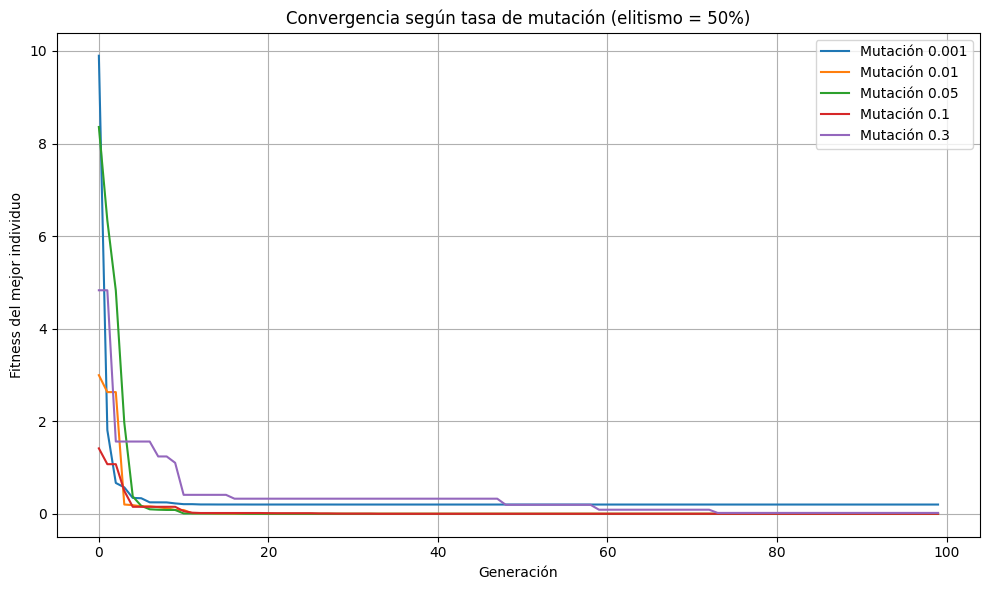

Ejecutando elitismo 0%
Ejecutando elitismo 25%
Ejecutando elitismo 50%
Ejecutando elitismo 75%
Ejecutando elitismo 100%


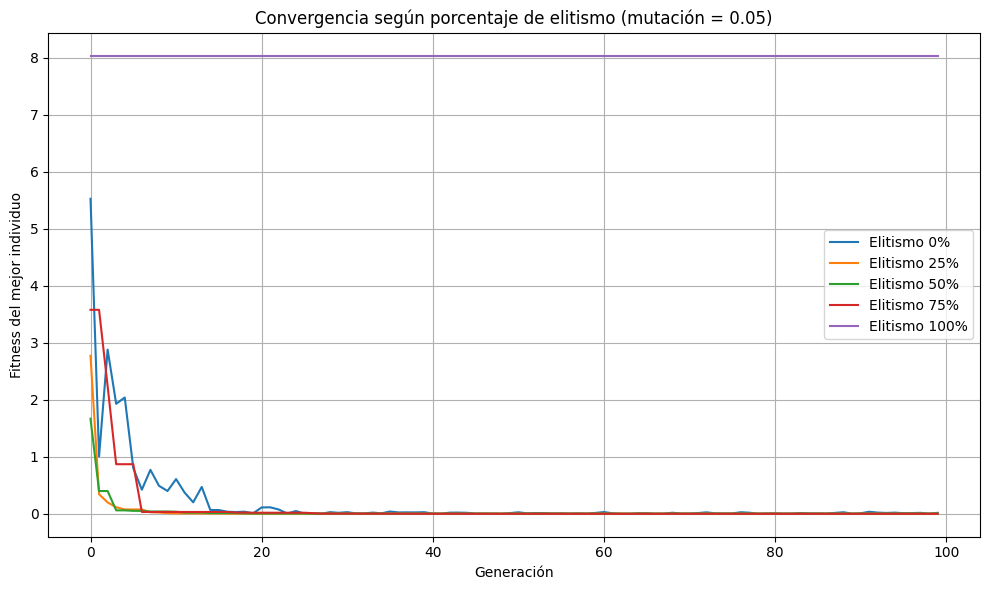

In [2]:
import random
import math
import matplotlib.pyplot as plt

# Configuración
TAMANO_POBLACION = 200
GENERACIONES = 100
NUMERO_VARIABLES = 3
BITS_POR_VARIABLE = 29
LONGITUD_TOTAL = NUMERO_VARIABLES * BITS_POR_VARIABLE

# Conversión binario <-> float
def float_a_binario(numero):
    signo = '0' if numero >= 0 else '1'
    numero = abs(numero)
    entero = int(numero)
    decimal = numero - entero
    bin_entero = f"{entero:03b}"[-3:]
    bin_decimal = ''
    for _ in range(25):
        decimal *= 2
        bin_decimal += '1' if decimal >= 1 else '0'
        if decimal >= 1:
            decimal -= 1
    return signo + bin_entero + bin_decimal

def binario_a_float(bin_str):
    signo = -1 if bin_str[0] == '1' else 1
    entero = int(bin_str[1:4], 2)
    decimal = sum(int(bit) * (0.5 ** i) for i, bit in enumerate(bin_str[4:], start=1))
    return signo * (entero + decimal)

def generar_individuo_binario():
    return ''.join(random.choice('01') for _ in range(NUMERO_VARIABLES * BITS_POR_VARIABLE))

def decodificar_individuo_binario(ind_bin):
    return [binario_a_float(ind_bin[i*29:(i+1)*29]) for i in range(3)]

def evaluar_aptitud_bin(individuo_bin):
    x, y, z = decodificar_individuo_binario(individuo_bin)
    f1 = 3 * x**2 + math.sin(x * y) - z**2 + 2
    f2 = 2 * x**3 - y**2 - z + 3
    f3 = math.sin(2 * x) + math.cos(y * z) + y - 1
    return f1**2 + f2**2 + f3**2

def seleccion_torneo_seguro(poblacion, k=3):
    k = min(k, len(poblacion))
    return min(random.sample(poblacion, k), key=evaluar_aptitud_bin)

def cruzar_corte_triple(padre_a, padre_b):
    longitud = len(padre_a)
    p1, p2 = sorted(random.sample(range(1, longitud - 1), 2))
    cabeza_a, centro_a, cola_a = padre_a[:p1], padre_a[p1:p2], padre_a[p2:]
    cabeza_b, centro_b, cola_b = padre_b[:p1], padre_b[p1:p2], padre_b[p2:]
    hijo1 = cabeza_b + centro_a + cola_b
    hijo2 = cabeza_a + centro_b + cola_a
    return hijo1, hijo2

def mutar_binario(individuo_bin, tasa_mutacion):
    return ''.join(
        bit if random.random() > tasa_mutacion else ('1' if bit == '0' else '0')
        for bit in individuo_bin
    )

def ejecutar_ega_binario(tasa_mutacion, porcentaje_elitismo):
    poblacion = [generar_individuo_binario() for _ in range(TAMANO_POBLACION)]
    historial = []

    for _ in range(GENERACIONES):
        poblacion.sort(key=evaluar_aptitud_bin)
        n_elite = int(TAMANO_POBLACION * porcentaje_elitismo)
        elite = poblacion[:n_elite]

        hijos = []
        while len(hijos) < TAMANO_POBLACION - n_elite:
            base = elite if len(elite) >= 3 else poblacion
            padre1 = seleccion_torneo_seguro(base)
            padre2 = seleccion_torneo_seguro(base)
            hijo1, hijo2 = cruzar_corte_triple(padre1, padre2)
            hijo1 = mutar_binario(hijo1, tasa_mutacion)
            hijo2 = mutar_binario(hijo2, tasa_mutacion)
            hijos.extend([hijo1, hijo2])
        poblacion = elite + hijos[:TAMANO_POBLACION - n_elite]
        mejor = min(poblacion, key=evaluar_aptitud_bin)
        historial.append(evaluar_aptitud_bin(mejor))

    return historial

# -------- Graficar tasa de mutación --------
tasas_mutacion = [0.001, 0.01, 0.05, 0.1, 0.3]
elitismo_fijo = 0.5
resultados_mutacion = {}

for tasa in tasas_mutacion:
    print(f"Ejecutando mutación {tasa}")
    resultados_mutacion[tasa] = ejecutar_ega_binario(tasa, elitismo_fijo)

plt.figure(figsize=(10, 6))
for tasa, hist in resultados_mutacion.items():
    plt.plot(hist, label=f"Mutación {tasa}")
plt.xlabel("Generación")
plt.ylabel("Fitness del mejor individuo")
plt.title("Convergencia según tasa de mutación (elitismo = 50%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -------- Graficar porcentaje de elitismo --------
porcentajes_elitismo = [0.0, 0.25, 0.5, 0.75, 1.0]
mutacion_fija = 0.05
resultados_elitismo = {}

for elit in porcentajes_elitismo:
    print(f"Ejecutando elitismo {int(elit * 100)}%")
    resultados_elitismo[elit] = ejecutar_ega_binario(mutacion_fija, elit)

plt.figure(figsize=(10, 6))
for e, hist in resultados_elitismo.items():
    plt.plot(hist, label=f"Elitismo {int(e*100)}%")
plt.xlabel("Generación")
plt.ylabel("Fitness del mejor individuo")
plt.title("Convergencia según porcentaje de elitismo (mutación = 0.05)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


